In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import tensorflow as tf
import splitfolders
from keras.models import Sequential
from keras.layers import Rescaling, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [2]:
# splitfolders.ratio("../Facial_Dataset", output="./Facial_Dataset_split", seed=1337, ratio=(.8, .2), group_prefix=None, move=False)

In [3]:
folder = os.listdir('./Facial_Dataset_split/train/')
folder

['Amogh_Naik',
 'Arshadali_Sayyed',
 'Atharv_Patil',
 'Chaitanya_Machutre',
 'Gurmeet_Kaur',
 'Harsh_Kabir',
 'Himanshu_Chauhan',
 'Kasheena_Mulla',
 'Kavin_Lartius',
 'Komal_Pal',
 'Kush_Parihar',
 'Lavanya_Bhambure',
 'Manoj_Kumar',
 'Mrunal_Pataskar',
 'Nikhil_Mahajan',
 'Pranav_Chavan',
 'Pranav_Waghmare',
 'Pranjal_Kumar',
 'Prathamesh_Prabhu',
 'Prathmesh_Deshmukh',
 'Shreyas_Nandanwar',
 'Sneha_Yadnik',
 'Weona_Lazarus']

In [4]:
folder_path = './Facial_Dataset_split/train/'
filename=[]
category = []
for folder in os.listdir(folder_path):
    folder_full_path = os.path.join(folder_path, folder)

    for file in os.listdir(folder_full_path):
        file_full_path = os.path.join(folder_full_path, file)

        if file.endswith('.jpg') or file.endswith('.jpeg'):
            img = cv2.imread(file_full_path)
            filename.append(file_full_path)
            category.append(folder)
df = pd.DataFrame( {'filenames' : filename, 'category': category})

In [5]:
df.head()

filenames    category
0  ./Facial_Dataset_split/train/Amogh_Naik\WIN_20...  Amogh_Naik
1  ./Facial_Dataset_split/train/Amogh_Naik\WIN_20...  Amogh_Naik
2  ./Facial_Dataset_split/train/Amogh_Naik\WIN_20...  Amogh_Naik
3  ./Facial_Dataset_split/train/Amogh_Naik\WIN_20...  Amogh_Naik
4  ./Facial_Dataset_split/train/Amogh_Naik\WIN_20...  Amogh_Naik

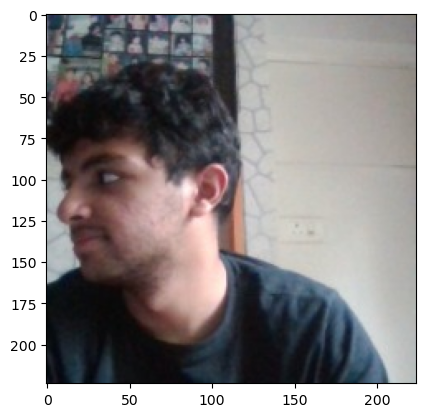

In [6]:
import random
sample = random.choice(filename)

image = cv2.imread(sample)
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [7]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_CHANNELS = 3

In [8]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.2, 0.5],
    zoom_range=0.4,
    horizontal_flip=True,
    fill_mode='nearest')


In [9]:
train_generator = datagen.flow_from_directory(
    './Facial_Dataset_split/train',
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=32,
    class_mode='categorical',)

Found 1556 images belonging to 23 classes.


In [10]:
val_test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
'./Facial_Dataset_split/val',
rescale=1/255,
validation_split = 0.1)

In [11]:
validation_generator = val_test_datagen.flow_from_directory(
    './Facial_Dataset_split/val',
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=32,
    shuffle = True,
    class_mode='categorical',
    subset = 'training')

Found 358 images belonging to 23 classes.


In [12]:
test_generator = val_test_datagen.flow_from_directory(
    './Facial_Dataset_split/val', # same directory as training data
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=32,
    shuffle =False,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 37 images belonging to 23 classes.


In [14]:
# Defining the model
model = Sequential()
# model.add(tf.keras.layers.Rescaling(1./255, input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS)))
model.add(Conv2D(32,(2,2),input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(50,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(23,activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 223, 223, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 64)      8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 54, 54, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 128)      0

In [16]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [17]:
# hist = model.fit(train_generator, epochs = 30, batch_size = 32 )

In [18]:
batch_size = 32
hist= model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = 30)

Epoch 1/30
48/48 [==============================] - ETA: 0s - loss: 2.8077 - accuracy: 0.1522

d:\Drive II\Anaconda\lib\site-packages\keras\preprocessing\image.py:1863: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


48/48 [==============================] - 74s 2s/step - loss: 2.8077 - accuracy: 0.1522 - val_loss: 2.2556 - val_accuracy: 0.4062
Epoch 2/30
48/48 [==============================] - 56s 1s/step - loss: 1.7534 - accuracy: 0.4593 - val_loss: 2.5323 - val_accuracy: 0.4261
Epoch 3/30
48/48 [==============================] - 55s 1s/step - loss: 1.0081 - accuracy: 0.6942 - val_loss: 0.6989 - val_accuracy: 0.8324
Epoch 4/30
48/48 [==============================] - 54s 1s/step - loss: 0.7119 - accuracy: 0.7776 - val_loss: 0.7491 - val_accuracy: 0.7784
Epoch 5/30
48/48 [==============================] - 54s 1s/step - loss: 0.5272 - accuracy: 0.8360 - val_loss: 0.2411 - val_accuracy: 0.9148
Epoch 6/30
48/48 [==============================] - 55s 1s/step - loss: 0.4391 - accuracy: 0.8675 - val_loss: 0.4372 - val_accuracy: 0.8494
Epoch 7/30
48/48 [==============================] - 56s 1s/step - loss: 0.3889 - accuracy: 0.8747 - val_loss: 0.2574 - val_accuracy: 0.9034
Epoch 8/30
48/48 [=============

In [19]:
model.save('./Facial_recog_model_3.h5')

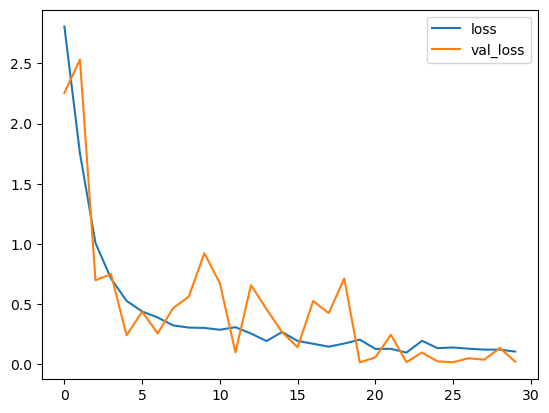

In [20]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

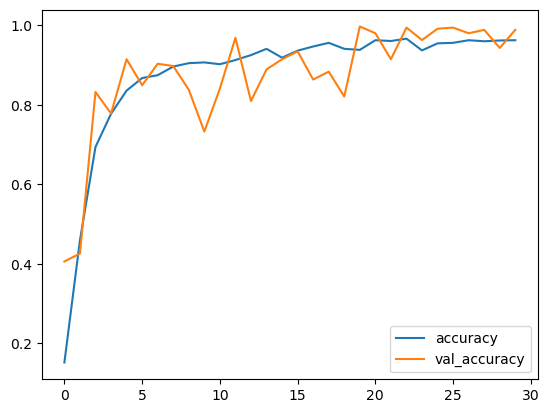

In [21]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [22]:
i =0
dict ={}
for x in os.listdir(folder_path):
    dict[i] = x
    i = i+1

dict

{0: 'Amogh_Naik',
 1: 'Arshadali_Sayyed',
 2: 'Atharv_Patil',
 3: 'Chaitanya_Machutre',
 4: 'Gurmeet_Kaur',
 5: 'Harsh_Kabir',
 6: 'Himanshu_Chauhan',
 7: 'Kasheena_Mulla',
 8: 'Kavin_Lartius',
 9: 'Komal_Pal',
 10: 'Kush_Parihar',
 11: 'Lavanya_Bhambure',
 12: 'Manoj_Kumar',
 13: 'Mrunal_Pataskar',
 14: 'Nikhil_Mahajan',
 15: 'Pranav_Chavan',
 16: 'Pranav_Waghmare',
 17: 'Pranjal_Kumar',
 18: 'Prathamesh_Prabhu',
 19: 'Prathmesh_Deshmukh',
 20: 'Shreyas_Nandanwar',
 21: 'Sneha_Yadnik',
 22: 'Weona_Lazarus'}

In [26]:
plt.figure(figsize=(13, 13))

for i in range(0,15):

    plt.subplot(5, 3, i+1)

    for X_batch, Y_batch in test_generator:

        image = X_batch[1]

        plt.imshow(image)

        title = np.argmax(Y_batch[1])
        
        plt.title(dict[title])

        break

plt.tight_layout()

plt.show()

In [32]:
y_preds= []
y_preds = model.predict(test_generator)


2/2 [==============================] - 1s 54ms/step


In [33]:
# making another variable for predicted classes which are not one-hot enocoded
y_pred_not_encoded = []
for pred in y_preds:
    ans = np.argmax(pred)
    y_pred_not_encoded.append(ans)
    print(dict[ans], sep=', ')

Amogh_Naik
Amogh_Naik
Arshadali_Sayyed
Arshadali_Sayyed
Atharv_Patil
Chaitanya_Machutre
Chaitanya_Machutre
Gurmeet_Kaur
Gurmeet_Kaur
Harsh_Kabir
Harsh_Kabir
Himanshu_Chauhan
Kasheena_Mulla
Kasheena_Mulla
Kavin_Lartius
Kavin_Lartius
Gurmeet_Kaur
Kush_Parihar
Lavanya_Bhambure
Lavanya_Bhambure
Nikhil_Mahajan
Nikhil_Mahajan
Pranav_Chavan
Pranav_Chavan
Pranav_Waghmare
Pranav_Waghmare
Pranjal_Kumar
Pranjal_Kumar
Prathamesh_Prabhu
Prathmesh_Deshmukh
Prathmesh_Deshmukh
Shreyas_Nandanwar
Shreyas_Nandanwar
Sneha_Yadnik
Sneha_Yadnik
Weona_Lazarus
Weona_Lazarus


In [34]:
y_true = test_generator.classes
y_true

array([ 0,  0,  1,  1,  2,  3,  3,  4,  4,  5,  5,  6,  7,  7,  8,  8, 10,
       10, 11, 11, 14, 14, 15, 15, 16, 16, 17, 17, 18, 19, 19, 20, 20, 21,
       21, 22, 22])

In [35]:
# Printing classification report
from sklearn.metrics import classification_report
y_true = test_generator.classes
print(classification_report(y_true,y_pred_not_encoded))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
          10       1.00      0.50      0.67         2
          11       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         2
          18       1.00      1.00      1.00         1
          19       1.00      1.00      1.00         2
          20       1.00    

In [36]:
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_not_encoded)
sns.heatmap(confusion_mtx, annot=True, fmt='g')

<Axes: >

1/1 [==============================] - 0s 100ms/step


'Gurmeet_Kaur'

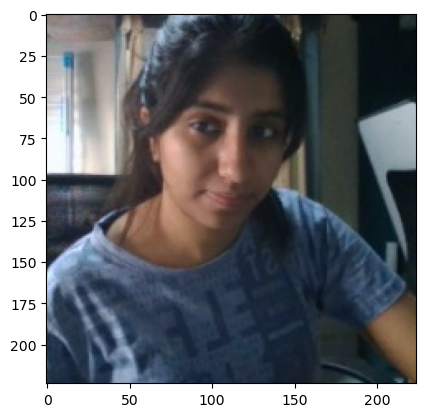

In [43]:
image = cv2.imread("./Facial_Dataset_split/val/Gurmeet_Kaur/20.jpg")
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img =  img/255.
img = cv2.resize(img, (224,224))
img = tf.expand_dims(img, 0)
img = np.array(img)
out = model.predict(img)
prediction = np.argmax(out)
dict[prediction]